In [3]:
import pandas as pd 



Neighborhood
Homewood South               50.000000
South Side Flats             34.905660
Larimer                      27.987421
Homewood North               27.358491
Hazelwood                    25.471698
Marshall-Shadeland           23.899371
Carrick                      23.899371
Perry South                  23.270440
Sheraden                     22.955975
Central Business District    22.641509
Garfield                     20.440252
Knoxville                    20.440252
Middle Hill                  19.811321
Lincoln-Lemington-Belmar     19.496855
Mount Washington             17.924528
East Hills                   17.295597
East Liberty                 16.981132
Brighton Heights             16.037736
Bedford Dwellings            15.723270
Central Northside            15.408805
Manchester                   15.094340
Allentown                    14.779874
Beechview                    13.522013
Spring Hill-City View        12.264151
Fineview                     11.949686
Crawford-Rob

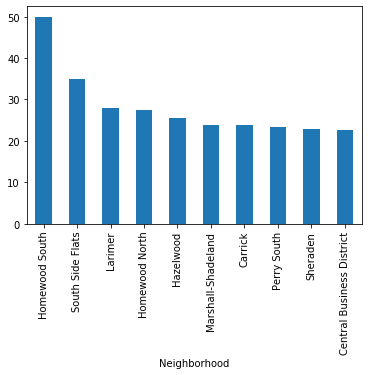

In [4]:
neighborhood = pd.read_csv("Neighborhoods_.csv")
hoodsdict = neighborhood['hood'].value_counts().to_dict()
neighborhood.set_index('hood')

firearms = pd.read_csv("Firearms.csv")
armsdict = firearms['neighborhood'].value_counts().to_dict()



score = hoodsdict


for key in armsdict:
    if key == 'Mount Oliver Borough':
        armsdict['Mt. Oliver'] = armsdict.pop(key)
        break
for key in armsdict:
    if key in score:
        score[key] = score[key] + armsdict[key]
        
array = list(score.values())
array.sort(reverse = True)
ratio = 50/array[0]
for key in score:
    score[key] = ratio * score[key]
s = pd.Series(score, name="Score")
s.index.name = "Neighborhood"
s.sort_values(ascending=False).iloc[0:10].plot(kind='bar')
print(s.sort_values(ascending=False).to_string())


Neighborhood
Shadyside                    50.000000
South Side Flats             45.333333
East Liberty                 43.333333
Bloomfield                   41.333333
North Shore                  40.000000
Strip District               34.000000
Squirrel Hill South          32.000000
Central Oakland              30.000000
Carrick                      28.666667
Middle Hill                  23.333333
Bluff                        22.000000
Homewood South               21.333333
Lower Lawrenceville          20.000000
Central Lawrenceville        20.000000
East Allegheny               19.333333
Mount Washington             17.333333
Brighton Heights             16.666667
Crawford-Roberts             14.666667
Hazelwood                    13.333333
Squirrel Hill North          12.666667
Brookline                    12.000000
Marshall-Shadeland           11.333333
Upper Lawrenceville          11.333333
Sheraden                     11.333333
Perry North                  11.333333
North Oaklan

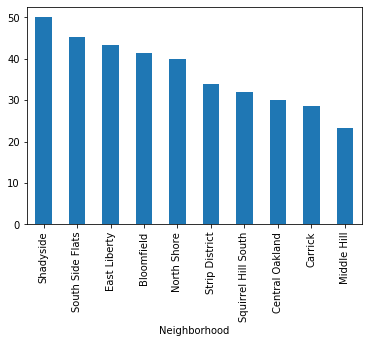

In [6]:
neighborhood = pd.read_csv("Neighborhoods_.csv")
hoodsdict = neighborhood['hood'].value_counts().to_dict()
neighborhood.set_index('hood')

cans = pd.read_csv("Cans.csv")
cansdict = cans['neighborhood'].value_counts().to_dict()

scoresCan = hoodsdict
for key in cansdict:
    if key == 'Mt. Oliver Neighborhood':
        cansdict['Mt. Oliver'] = cansdict.pop(key)
        break
for key in cansdict:
    if key == 'Mount Oliver':
        cansdict['Mt. Oliver'] = cansdict['Mt. Oliver'] + cansdict.pop(key)
        break
for key in cansdict:
    if key in scoresCan:
        scoresCan[key] = scoresCan[key] + cansdict[key]
array = list(scoresCan.values())
array.sort(reverse=True)
ratio = 50/array[0]

for key in scoresCan:
    scoresCan[key] = ratio * scoresCan[key]
s = pd.Series(scoresCan, name="Score")
s.index.name = "Neighborhood"
s.sort_values(ascending=False).iloc[0:10].plot(kind='bar')
print(s.sort_values(ascending = False).to_string())

Neighborhood
Shadyside                    94.339623
North Shore                  87.798742
Bloomfield                   82.213836
Strip District               78.968553
Central Oakland              76.540881
East Liberty                 76.352201
Squirrel Hill South          75.396226
Lower Lawrenceville          67.484277
Central Lawrenceville        64.654088
Bluff                        61.937107
Squirrel Hill North          60.465409
South Side Flats             60.427673
East Allegheny               58.641509
Upper Lawrenceville          58.188679
North Oakland                58.188679
Friendship                   57.408805
Polish Hill                  55.836478
West End                     55.723270
Allegheny West               55.635220
Morningside                  54.779874
Carrick                      54.767296
Crawford-Roberts             53.974843
Highland Park                53.635220
Middle Hill                  53.522013
Allegheny Center             53.522013
Greenfield  

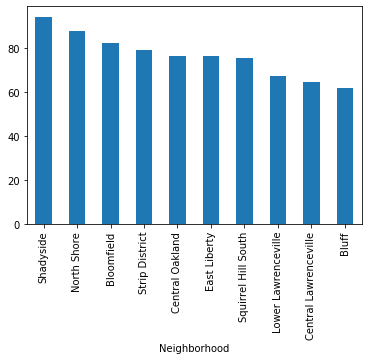

In [7]:
totalScores = score
for key in score:
    totalScores[key] = 50 + scoresCan[key] - score[key]
s = pd.Series(totalScores, name="Score")
s.index.name = "Neighborhood"
isSorted = s.sort_values(ascending = False)
isSorted.iloc[0:10].plot(kind='bar')
print(isSorted.to_string())